# Exploratory Data Visualisation (EDV) of Employement data in Data Industry

<center>

![Data Industry](https://i.imgur.com/4vQth0q.jpeg "Data Industry")
</center>

This dataset encapsulates a rich, multifaceted view of the data industry's job market from 2020 to 2023, providing a comprehensive snapshot of salary trends, job titles, and employment types, along with geographical and company-related dynamics. Given today’s competitive job market, these insight are a valuable resource for analyzing the evolving landscape of data-related careers, encompassing a wide array of roles from 'Data Analyst' to 'Machine Learning Engineer' and positions from entry-level to executive status. The dataset’s inclusion of salary details:
* Local currencies and standardized USD will allows for direct regional comparisons as well as global salary evaluations, presenting an opportunity to explore how remuneration in the data field correlates with geographical location, and currency strength. Additionally, the `employee_residence` and `company_location` columns open avenues to assess the impact of labor markets and economic conditions specific to regions on the compensation packages.
* `job_category` field will enable the categorization of roles into broader areas such as 'Data Analysis', 'Machine Learning', and 'Data Engineering', offering insights into specialized segments within the industry. With this, we can explore which specialties are commanding higher salaries and how these trends shift over time.
* Employment types and work settings detailed in the dataset will shed light on the industry’s structural and cultural environment, indicating preferences for full-time, part-time, contract, or freelance roles, and revealing the salary implications of each. This also extends to the understanding of the impact of remote, in-person, and hybrid work settings on salary levels.
* `company_size` information will provide a perspective on how the scale of an employer might influence compensation, potentially illustrating differences in salary structures between small startups and large corporations.

The EDV will aim to uncover underlying patterns, detect anomalies, test hypotheses, and check assumptions with the help of statistical figures and visualizations. By the end of this exploration, we aim to extract actionable insights that could inform both employees and employers in the data industry about current compensation trends and the factors that influence them.


## Downloading and Loading the Data

### Importing libraries

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

In [2]:
jobs_df = pd.read_csv('/content/drive/MyDrive/1707906704956_bd39ad768d9d5e24.csv')
jobs_df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


## Looking at the Summary and Structure of our database

In [3]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
jobs_df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


The table provides a statistical summary of salary data within the given dataset.
* The `count` indicates that there are 9,355 recorded salary entries. The `mean` salary is approximately 149,927 in local currency and 150,299 USD, showing that when averaged, the salary is consistently around the 150k mark across different currencies when converted to USD. This suggests a fairly high level of compensation within the data industry jobs covered by the dataset.
* The `standard deviation (std)` values are relatively high, at around 63,608 for local currency and 63,177 for USD, indicating significant variability in salaries, which could be due to a wide range of job titles and experience levels within the dataset.
* The minimum (`min`) salaries reported are 14,000 in local currency and 15,000 USD, whereas the maximum (`max`) salaries reach up to 450,000 in both local currency and USD, showing a broad range of salaries.
* The 25th percentile (`25%`) is over 105,000, the median (`50%`) is approximately 143,860 local currency or 143,000 USD, and the 75th percentile (`75%`) is around 187,000, which implies that 50% of the salaries are above 143k USD and 25% are above 187k USD, indicating a skewed distribution towards the higher end. This could reflect the presence of high-paying senior or specialized roles in the data.

In [5]:
# Filter out numerical columns
numerical_columns = jobs_df.select_dtypes(include=['int', 'float']).columns

# Compute skewness for numerical columns only
numerical_skew = jobs_df[numerical_columns].skew()
numerical_skew

work_year       -2.429083
salary           0.579149
salary_in_usd    0.621291
dtype: float64

The skewness values provide insight into the asymmetry of the distribution for each numerical column in the dataset.

* For `work_year`, the skewness is -2.429083, which is a large negative value, indicating a distribution that tails off to the left. This suggests that the data is heavily weighted towards more recent years, with fewer entries in the earlier years covered by the dataset.

* The `salary` and `salary_in_usd` columns have skewness values of 0.579149 and 0.621291, respectively. These are moderately positive, indicating that the salary distributions are slightly right-skewed. This means there are a higher number of lower salaries with fewer, but significant, instances of very high salaries that pull the mean above the median, which is typical in income data where a small number of very high salaries can increase the average. This pattern is common in job markets, where a majority earn within a common range, and a few high earners elevate the average.

In [6]:
# Compute kurtosis for numerical columns only
numerical_kurt = jobs_df[numerical_columns].kurt()
numerical_kurt

work_year        6.673980
salary           0.470611
salary_in_usd    0.567242
dtype: float64

The kurtosis values indicate the "tailedness" or the peakedness of the distribution for each numerical column.

* A kurtosis value of 6.673980 for `work_year` is significantly high, suggesting a leptokurtic distribution. This means that the data has heavy tails or outliers, with more values falling far from the mean compared to a normal distribution. This could imply that there are years with unusual spikes or drops in data entries.
* For `salary` and `salary_in_usd`, the kurtosis values are 0.470611 and 0.567242, respectively. These are relatively close to zero, indicating distributions that are slightly more peaked than the normal distribution (mesokurtic). This suggests a moderate presence of outliers with salaries significantly above or below the average, but not as extreme as the `work_year` distribution. These distributions may have a slightly higher probability of extreme values, both low and high, which can affect the mean and variance.

In [7]:
# Compute correlation for numerical columns only
numerical_corr = jobs_df[numerical_columns].corr()
numerical_corr

,work_year,salary,salary_in_usd
work_year,1.000000,0.160708,0.166003
salary,0.160708,1.000000,0.991309
salary_in_usd,0.166003,0.991309,1.000000


The correlation table indicates the relationship between 'work_year', 'salary', and 'salary_in_usd'.
- The 'work_year' has a very weak positive correlation with both 'salary' and 'salary_in_usd' (0.160708 and 0.166003, respectively), suggesting that the year has little to no linear relationship with the salary amounts.
- 'Salary' and 'salary_in_usd' are almost perfectly correlated (0.991309), indicating that these two variables move almost identically. This high correlation suggests that 'salary_in_usd' could be a direct conversion of 'salary' into USD, showing that changes in one are directly reflected in the other without much loss of information.

These insights suggest that while salary values are closely linked regardless of the currency, the year of work does not significantly influence salary amounts.

In [8]:
nan_values = jobs_df.isna().sum().sort_values(ascending=False)/len(jobs_df)*100
nan_values

work_year             0.0
job_title             0.0
job_category          0.0
salary_currency       0.0
salary                0.0
salary_in_usd         0.0
employee_residence    0.0
experience_level      0.0
employment_type       0.0
work_setting          0.0
company_location      0.0
company_size          0.0
dtype: float64

## Visualising Data relationships

### Visualising Numeric columns

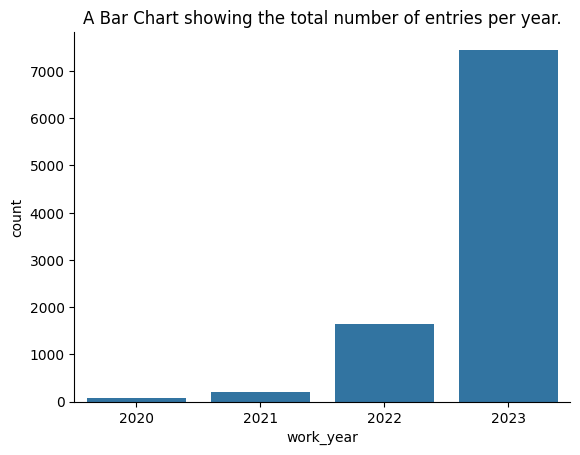

In [9]:
sns.countplot(jobs_df, x='work_year').set(title="A Bar Chart showing the total number of entries per year.");
plt.gca().spines[['top', 'right',]].set_visible(False);

The bar chart clearly shows an upward trend in the number of entries over time. In 2020, the count starts off relatively low, with no visible bar. This increases modestly in 2021, shown by a small bar. In 2022, there is a slight increment. A significant surge is evident in 2023, where the bar reaches its peak, indicating the highest number of entries among the displayed years. This suggests an exponential increase in data collection or event occurrences captured by the entries in the given context.

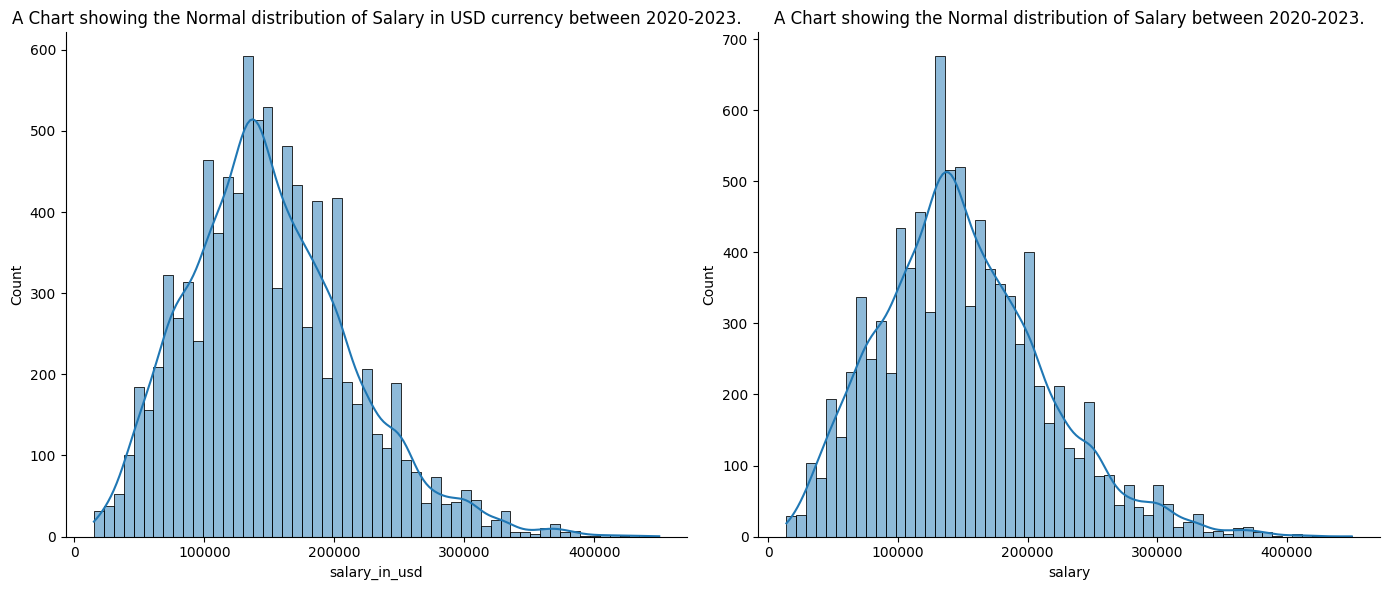

In [10]:
# Set up the matplotlib figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first histogram on the first axis
sns.histplot(jobs_df['salary_in_usd'], kde=True, ax=axes[0]).set(title="A Chart showing the Normal distribution of Salary in USD currency between 2020-2023.")
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Plot the second histogram on the second axis
sns.histplot(jobs_df['salary'], kde=True, ax=axes[1]).set(title="A Chart showing the Normal distribution of Salary between 2020-2023.")
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

The first histogram on the left shows the distribution of salaries converted to United States Dollars (USD). This allows for a standardized comparison across different geographies. The distribution is normally distributed with the majority of salary counts concentrated in the middle range, suggesting a common salary range that most of the data points fall into.

The second histogram on the right illustrates the distribution of salaries in local currencies. This distribution also appears to be normally distributed but has different peaks and spreads due to the variance in local economic conditions and currency values.

From the two, one can discern that the shape of the distributions is quite similar, indicating that the salary data, regardless of the currency, follows a normal distribution pattern. The USD conversion likely smooths out some of the variations that might be caused by exchange rate fluctuations or differences in local economic conditions. The key difference would be in the actual salary values, which are not directly comparable due to the currency difference; however, the overall pattern of distribution remains consistent, which suggests that the underlying salary structures are similar across different regions when converted to a common currency for global analysis. This also implies that the salaries, when viewed in USD, may offer a more uniform perspective for global comparison, whereas the local currency salaries are more relevant for understanding regional economic conditions and standards.

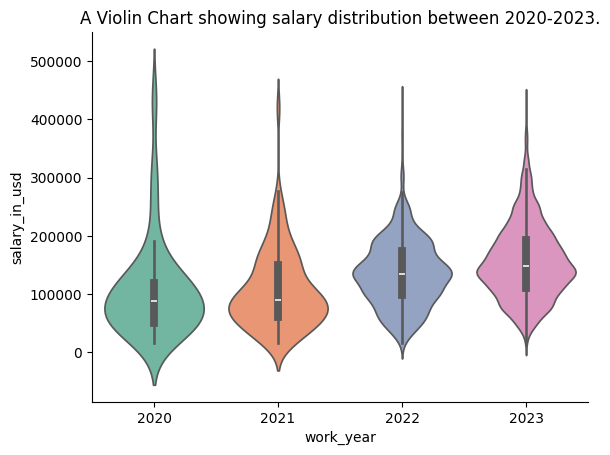

In [11]:
sns.violinplot(jobs_df, x='work_year', y='salary_in_usd',
               hue='work_year', palette='Set2').set(title="A Violin Chart showing salary distribution between 2020-2023.");
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend().remove();

The violin plot compares the annual gross salary distributions across four different years. Each violin represents the salary distribution for a given year, with the width indicating the density of data points at different salary levels.The main take aways include:

- The median salary, shown by the white dot, seems to remain relatively stable over the years.
- The interquartile range, depicted by the thick black bar within each violin, suggests there's some variation in salary distribution from year to year.
- The 'tails' of each violin, which indicate the range of salaries, show that there is a wide spread in each year, with the top and bottom extremes remaining consistent over time.
- There is no drastic change in the distribution shape from year to year, suggesting stability in salary distribution across the data sector.

### Visualising Categoric columns

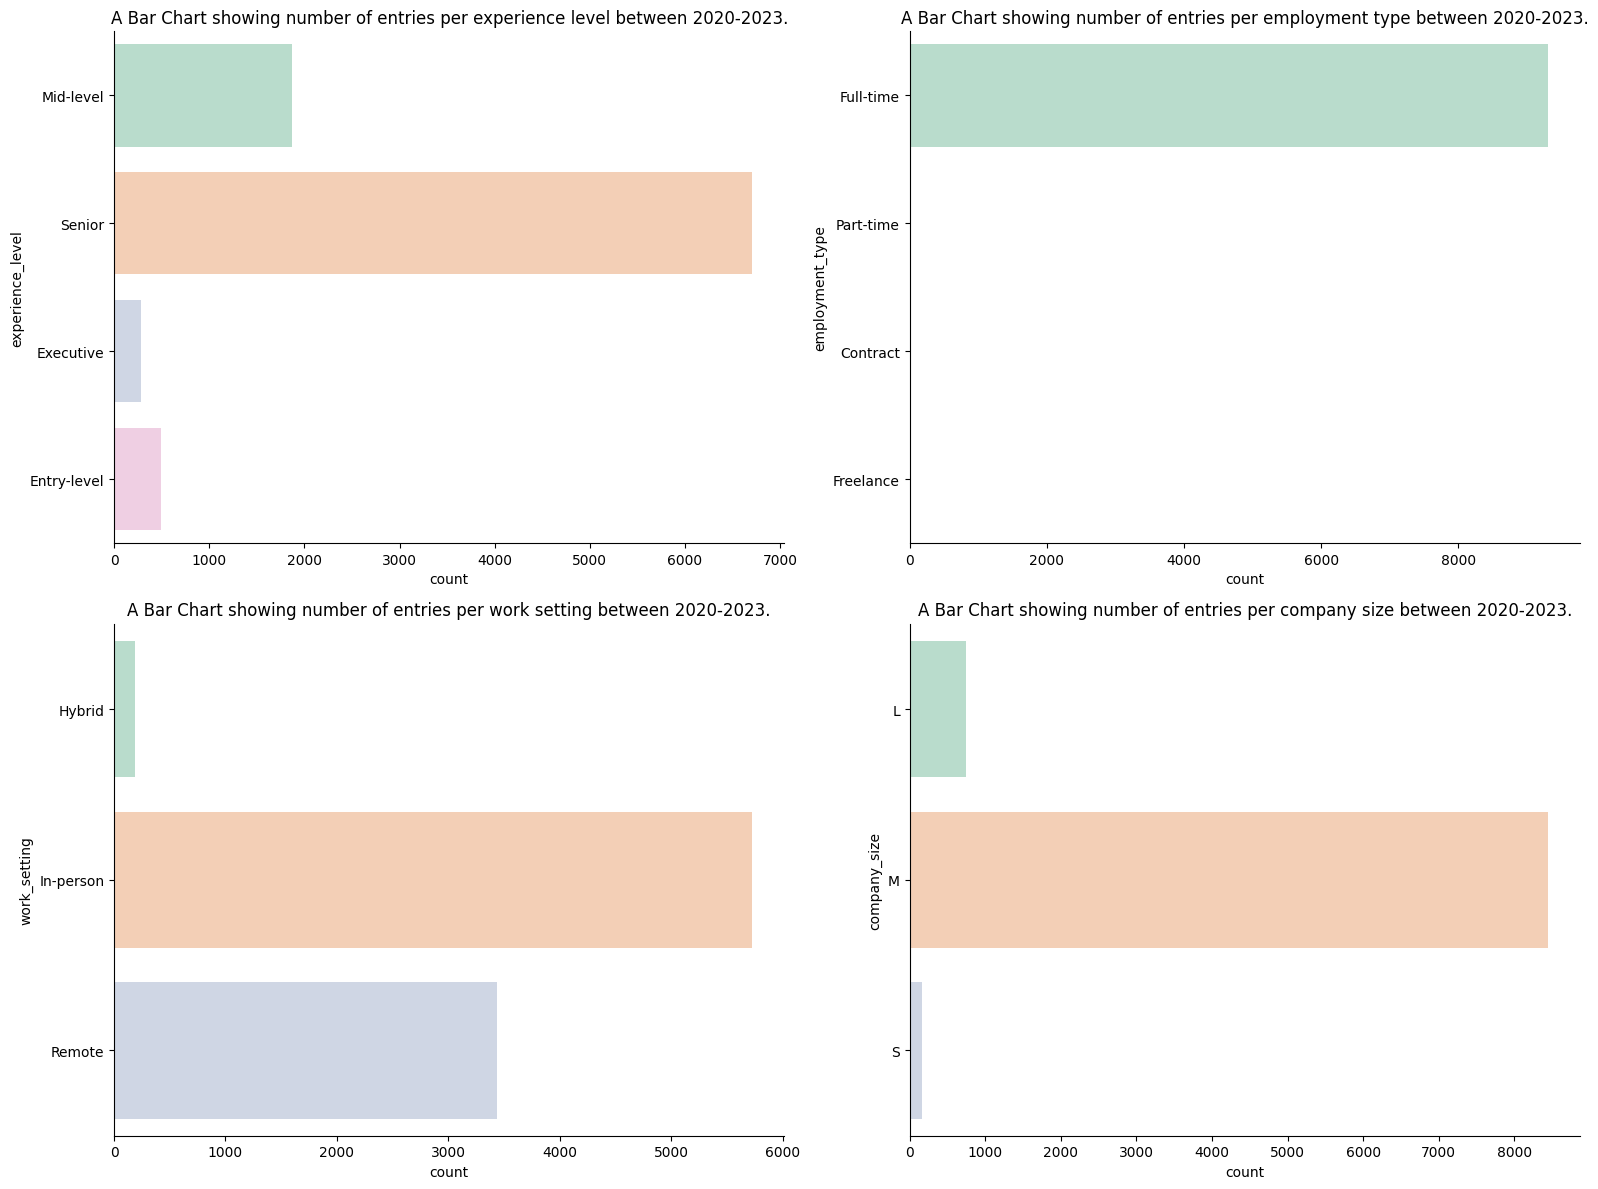

In [12]:
# Set up the matplotlib figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot the first countplot on the first subplot
sns.countplot(data=jobs_df, y='experience_level', palette='Pastel2',
              hue='experience_level', ax=axes[0, 0]).set(title="A Bar Chart showing number of entries per experience level between 2020-2023.")
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)

# Plot the second countplot on the second subplot
sns.countplot(data=jobs_df, y='employment_type', palette='Pastel2',
              hue='employment_type', ax=axes[0, 1]).set(title="A Bar Chart showing number of entries per employment type between 2020-2023.")
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)

# Plot the third countplot on the third subplot
sns.countplot(data=jobs_df, y='work_setting', palette='Pastel2',
              hue='work_setting', ax=axes[1, 0]).set(title="A Bar Chart showing number of entries per work setting between 2020-2023.")
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)

# Plot the fourth countplot on the fourth subplot
sns.countplot(data=jobs_df, y='company_size', palette='Pastel2',
              hue='company_size', ax=axes[1, 1]).set(title="A Bar Chart showing number of entries per company size between 2020-2023.")
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

The grid of count plots represents data on employees in the data sector from 2020 to 2023, divided into four categories: experience level, employment type, work setting, and company size.

**Experience Level Plot:**
- Shows the distribution of employees across different professional experience levels.
- Senior-level positions have the highest count, followed by mid-level, with executive and entry-level positions being the least common.
- This could indicate a mature industry with a larger number of experienced professionals, or possibly that senior roles are more commonly reported or defined within the dataset.

**Employment Type Plot:**
- Illustrates the types of employment arrangements.
- Full-time roles dominate significantly, with other types like part-time, contract, and freelance having much fewer entries.
- This suggests that the data sector is primarily composed of full-time positions, which may reflect stability or a standard employment model in the industry.

**Work Setting Plot:**
- Depicts where employees are working: remotely, in-person, or in a hybrid setting.
- Remote work has the highest count, indicating a possible trend towards or acceptance of remote work arrangements in the data industry.
- Hybrid settings are less common than remote but more common than in-person, suggesting a shift in work culture post-2020.

**Company Size Plot:**
- Shows the employee distribution by the size of their employer company.
- Large companies have the highest number of entries, with medium companies following, and small companies having the least.
- This could reflect the dataset's bias, or it might indicate that larger companies employ more data professionals or that they report data more frequently.

**Comparisons:**
- The dominance of full-time roles across all experience levels suggests that despite the rise of gig economy, permanent roles are still prevalent in the data sector.
- The preference for remote and hybrid settings over in-person could be influenced by the global shift to remote work practices post-2020.
- The prevalence of employees from larger companies might indicate higher recruitment in data roles or better reporting practices in larger firms compared to smaller ones.

Each subplot offers insight into the structure and dynamics of employment in the data industry, reflecting trends in work culture, employment types, and company sizes between 2020 and 2023.

### Visualising the Relationships between Numeric and Categoric columns

In [13]:
# Define a function that creates the abbreviation
def abbreviate_job_title(title):
    words = title.split()  # Split the title into words
    if len(words) > 1:
        # Take the first letter of the first word and the first letter of the last word
        return words[0][0] + words[-1][0]
    else:
        # If there is only one word, just use its first letter
        return words[0][0]

# Apply the function to the job_title and job_category column to create a new job_title_sh and job_category column
jobs_df['job_title_sh'] = jobs_df['job_title'].apply(abbreviate_job_title)
jobs_df['job_category_sh'] = jobs_df['job_category'].apply(abbreviate_job_title)

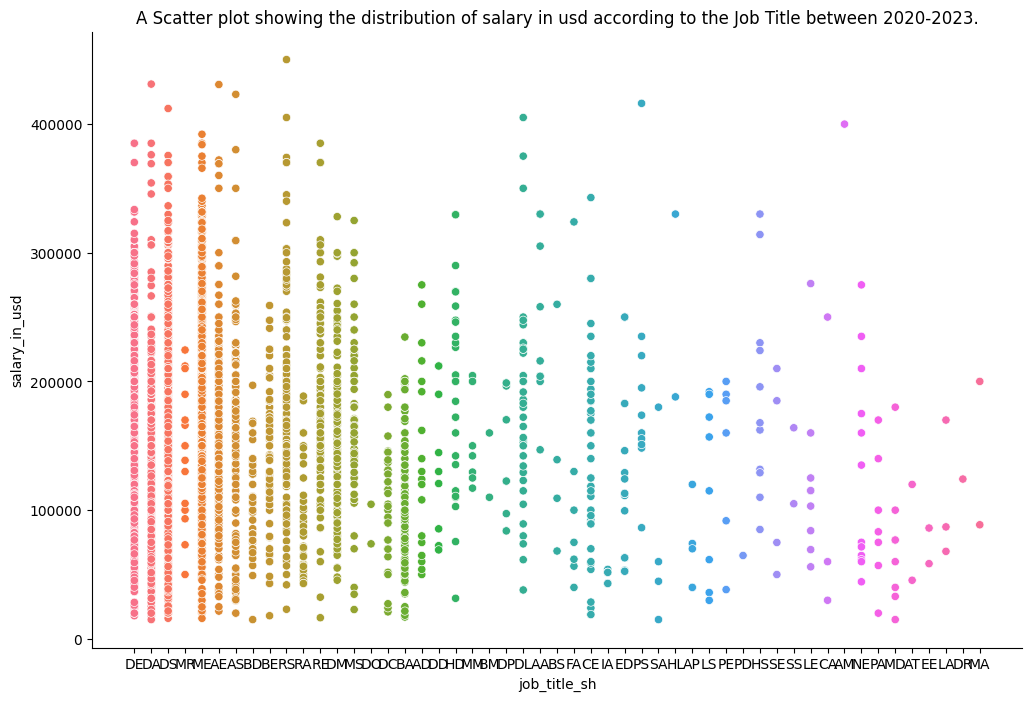

In [14]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(data=jobs_df, x='job_title_sh', y='salary_in_usd', hue='job_title_sh')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend().remove()
plt.title('A Scatter plot showing the distribution of salary in usd according to the Job Title between 2020-2023.');

# Show the plot
plt.show()

The scatter plot visualizes the relationship between job titles and the corresponding annual salaries in USD. Each dot represents an individual salary point for a specific job title on the x-axis, with the y-axis displaying the salary amount. Distinct clusters can be observed, suggesting that different job roles have varying salary ranges.

Some job titles have a wide range of salaries, indicated by the vertical spread of dots, implying a significant variation in pay within the same job role. Other titles show a more concentrated cluster, suggesting less variation in the salary for those roles. The color gradient may indicate different categories or years, with denser areas possibly representing more common salary ranges for particular titles. High salary ranges are less densely populated, indicating fewer individuals with very high salaries.

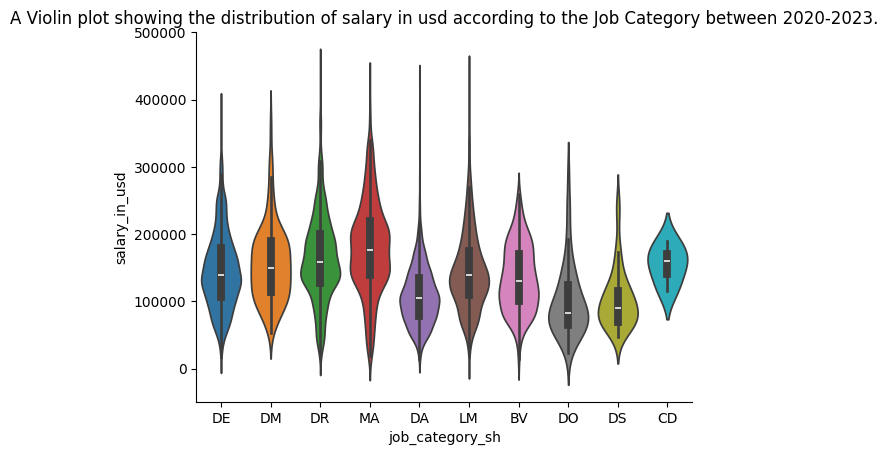

In [15]:
# Create the scatter plot
sns.violinplot(jobs_df, x='job_category_sh', y='salary_in_usd', hue='job_category_sh')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('A Violin plot showing the distribution of salary in usd according to the Job Category between 2020-2023.');

# Show the plot
plt.show()

The violin plot provides a visual summary of salary distributions across different job categories in USD from 2020 to 2023. Each 'violin' represents a job category on the x-axis, with the y-axis indicating the salary range. The width of each violin indicates the density of data points at different salary levels within that category, with wider sections representing a higher concentration of data points.

Each violin shape encapsulates the distribution of salaries within a job category, with thicker sections indicating a higher frequency of data points (salaries) and thinner sections indicating fewer occurrences. The white points represent the median salaries, the thick bar within the violins denotes the interquartile range, and the thin lines extending from the violins indicate the range of the data, showing the variability and outliers in salary within each category.

These violins show the distribution of salaries, the spread of data, and the probability density of the data at different values. Most categories have a broad distribution of salaries, with some showing a wider range, suggesting greater variation in pay. There varying widths of the violins, which reflects the density and dispersion of salaries. Some categories exhibit wide violins, indicating significant diversity in salary, while others are narrower, showing less variability. The plot highlights the differences in salary distributions, which could be crucial for stakeholders analyzing compensation trends or for professionals navigating career choices.

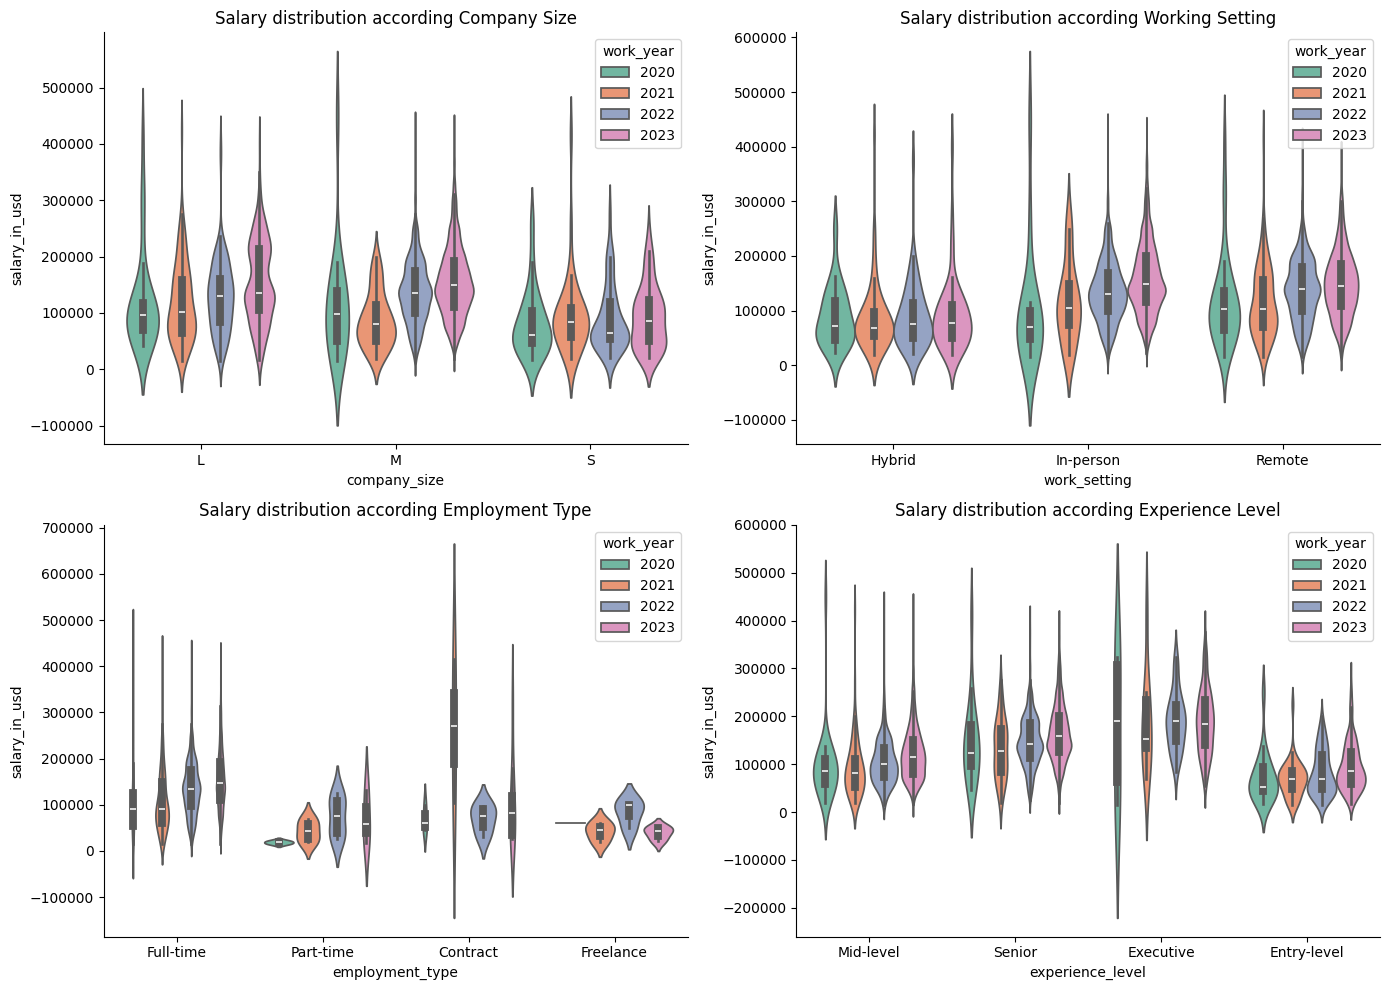

In [16]:
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.violinplot(data=jobs_df, x='company_size', y='salary_in_usd', hue='work_year', palette='Set2', ax=axes[0, 0])
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].set_title('Salary distribution according Company Size')

sns.violinplot(data=jobs_df, x='work_setting', y='salary_in_usd', hue='work_year', palette='Set2', ax=axes[0, 1])
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].set_title('Salary distribution according Working Setting')

sns.violinplot(data=jobs_df, x='employment_type', y='salary_in_usd', hue='work_year', palette='Set2', ax=axes[1, 0])
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].set_title('Salary distribution according Employment Type')

sns.violinplot(data=jobs_df, x='experience_level', y='salary_in_usd', hue='work_year', palette='Set2', ax=axes[1, 1])
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].set_title('Salary distribution according Experience Level')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

The grid of violin plots displays the distribution of salaries across various factors from 2020 to 2023.

**Company Size:**
- Large companies tend to have a wider range of salaries, while small companies have a narrower distribution.
- Medium-sized companies show consistent salary distributions over the years, while large companies show some fluctuation.

**Work Setting:**
- Remote work settings exhibit a broad salary range across all years, potentially due to a wide variety of roles.
- Hybrid and in-person settings show similar distributions but with slightly less variance compared to remote settings.

**Employment Type:**
- Full-time roles have the broadest salary distributions, indicating a variety of roles and experience levels.
- Part-time and contract roles show much lower salary levels, reflecting the nature of such employment.
- Freelance roles have a wide range but lower median salaries, which may reflect the volatility and diversity of freelance work.

**Experience Level:**
- Executive roles exhibit the highest salaries, as expected, with a significant spread.
- Senior roles also show high salary levels but with a slightly lower median than executives.
- Mid-level roles have a moderate salary range, while entry-level roles show the lowest salary distributions.

**Key Features:**
- Across all categories, the salary distributions remain relatively stable over the years, without dramatic shifts in medians or ranges.
- There is a clear progression in salary distributions based on experience level, with higher roles commanding greater salaries.
- Company size seems to influence the range of salaries offered, with larger companies providing a broader range.
- Work settings do not show drastic differences in salary distributions, suggesting that salary may not be heavily influenced by where one works.

**Comparisons:**
- Salaries in larger companies and for full-time roles have the widest distributions, reflecting diversity in roles and possibly negotiations based on experience and skill levels.
- The consistency across years in each category suggests that the data industry's salary structures are relatively stable.
- The progression of salary ranges from entry-level to executive roles highlights the impact of experience and seniority on earning potential in the data field.

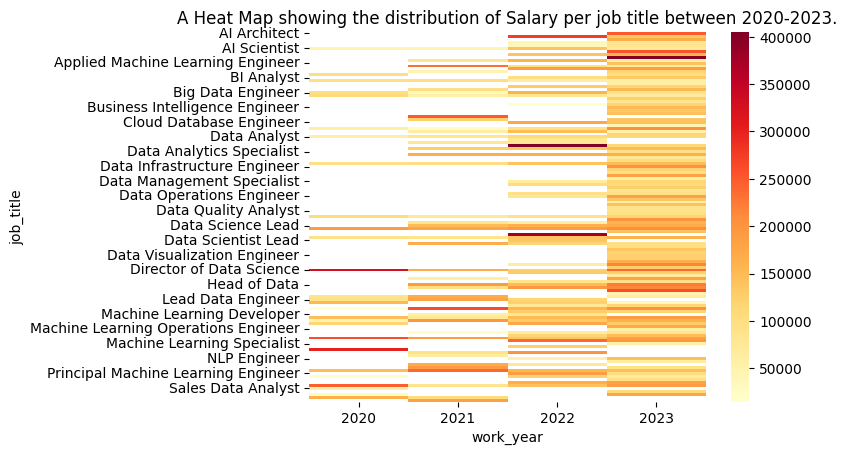

In [17]:
# Using .pivot_table to create a pivot table of magnitude of salary in USD of each job title per work year
work_heat = jobs_df.pivot_table(index='job_title', columns='work_year', values='salary_in_usd')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(work_heat, cmap='YlOrRd').set(title="A Heat Map showing the distribution of Salary per job title between 2020-2023.");

The heat map visualizes the distribution of salaries for various data-related job titles from 2020 to 2023. Warmer colors represent higher salaries, while cooler colors indicate lower salaries. The following key information can be deduced:

- Certain job titles, particularly those at the executive level such as 'Director of Data Science' and 'Head of Data', consistently show high salary levels across all years, as indicated by the prevalence of red and orange hues.
- There is a noticeable increase in salary for some roles from 2020 to 2023, suggesting possible salary growth or higher value placed on those positions over time.
- Some roles, like 'Data Scientist' and 'Machine Learning Engineer', appear to have a broad salary range across different years, which could reflect a mix of entry-level to senior positions within those titles.
- A few job titles show a significant variance in salary from year to year, which might be due to changes in demand, data sample size, or market factors affecting those specific roles.

Overall, the heat map provides a comparative view of salary trends across different job titles in the data field, indicating which roles are the highest paid and how these patterns evolve over time.

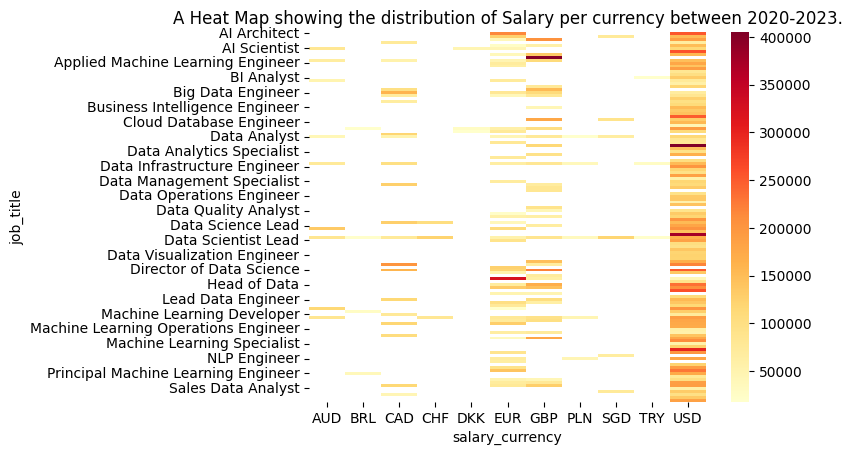

In [18]:
# Using .pivot_table to create a pivot table of magnitude of salary in USD of each job title per work year
currency_heat = jobs_df.pivot_table(index='job_title', columns='salary_currency', values='salary_in_usd')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(currency_heat, cmap='YlOrRd').set(title="A Heat Map showing the distribution of Salary per currency between 2020-2023.");

The heat map presents the distribution of salaries across various job titles in the data field, with each salary converted to USD and grouped by the original currency of payment. The x-axis lists the different currencies, while the y-axis shows the job titles.

Key observations from the plot include:

- Salaries paid in USD have the highest values across most job titles, which is evident from the concentration of warmer colors (yellow to red) in the USD column.
- Other currencies like EUR and GBP also show higher salary ranges for certain roles, which could be indicative of competitive pay in regions using these currencies.
- Some job titles, especially higher-ranking ones like 'Director of Data Science' and 'Head of Data', have a wide salary range across different currencies, reflecting their international demand and compensation variations by region.
- The cooler colors (lighter shades) in columns of other currencies suggest that when converted to USD, these salaries might be lower, or there are fewer data points available for those currencies.

The plot is instrumental in comparing how salaries for the same roles can vary significantly depending on the currency, which underscores the importance of considering the cost of living and currency strength when evaluating salary data globally.

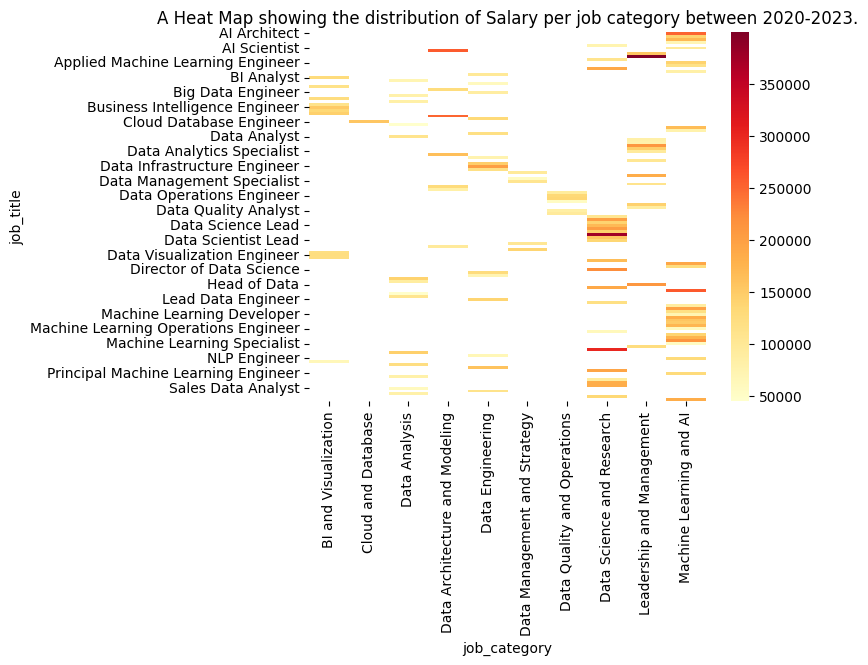

In [19]:
# Using .pivot_table to create a pivot table of magnitude of salary in USD of each job title per work year
category_heat = jobs_df.pivot_table(index='job_title', columns='job_category', values='salary_in_usd')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(category_heat, cmap='YlOrRd').set(title="A Heat Map showing the distribution of Salary per job category between 2020-2023.");

The heat map provides a visual distribution of salaries in USD across different job titles and categories in the data field from 2020 to 2023. The x-axis represents job categories, while the y-axis lists specific job titles.

Key observations:

- The 'Leadership and Management' category has the highest salaries, particularly for titles like 'Director of Data Science' and 'Head of Data,' as indicated by the deep red color.
- 'Machine Learning and AI' is another high-paying category, showing significant salary amounts for positions like 'Machine Learning Engineer.'
- Categories such as 'Data Analysis' and 'Data Engineering' display moderate to high salary distributions, with varying intensities indicating a range of salaries within these roles.
- Some job titles, like 'Data Scientist' and 'Data Analyst,' span multiple categories, suggesting these roles are versatile and exist across different specializations within the data field.
- The overall color gradients from yellow to red across the categories depict a general increasing trend from technical roles to managerial and specialized AI roles in terms of salary.

The plot underscores the variance in compensation based on specialization within the data sector, highlighting the premium placed on leadership roles and advanced technical skills like AI and machine learning.

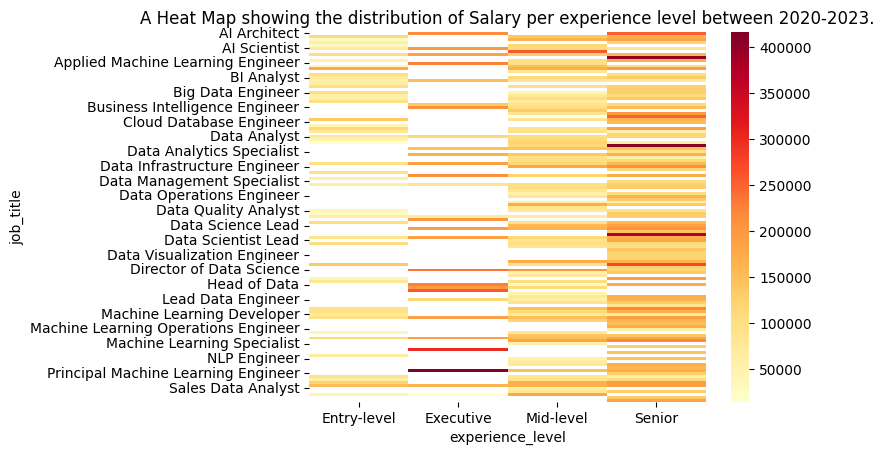

In [20]:
# Using .pivot_table to create a pivot table of magnitude of salary in USD of each job title per work year
experience_heat = jobs_df.pivot_table(index='job_title', columns='experience_level', values='salary_in_usd')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(experience_heat, cmap='YlOrRd').set(title="A Heat Map showing the distribution of Salary per experience level between 2020-2023.");

The heat map illustrates the distribution of annual salaries in USD across various job titles in the data field, categorized by experience level from 2020 to 2023.

Key observations from the heat map:

- Executive roles tend to have the highest salary ranges, with deep red colors indicating the top end of the salary spectrum, particularly for titles like 'Director of Data Science' and 'Head of Data'.
- Senior-level positions also command high salaries, but with a slightly broader distribution across job titles, as shown by the prevalence of red and orange hues.
- Mid-level roles have a more moderate salary range, indicated by the lighter shades of orange and yellow.
- Entry-level positions have the lowest salary distribution, as expected, with the colors ranging from light yellow to orange.
- Certain job titles, such as 'Data Scientist' and 'Machine Learning Engineer', appear across multiple experience levels, indicating varied salary potential depending on experience.

The plot demonstrates the strong correlation between experience level and salary within the data profession, with a clear progression from entry-level to executive positions. It also highlights the salary growth potential as one advances in their career.

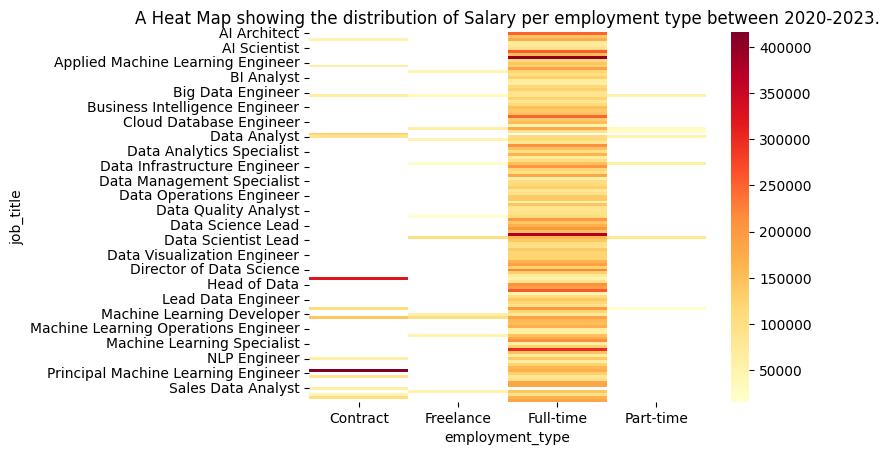

In [21]:
# Using .pivot_table to create a pivot table of magnitude of salary in USD of each job title per work year
employment_heat = jobs_df.pivot_table(index='job_title', columns='employment_type', values='salary_in_usd')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(employment_heat, cmap='YlOrRd').set(title="A Heat Map showing the distribution of Salary per employment type between 2020-2023.");

The heat map displays the salary distribution across various job titles in the data field, segmented by employment type from 2020 to 2023.

Key insights include:

- Full-time positions exhibit the highest salaries across almost all job titles, indicated by the intense warm colors extending through the full-time column.
- Contract roles also show substantial salary figures, but the distribution is narrower and less intense compared to full-time roles, suggesting that while contract jobs can be well-compensated, the highest salaries are more commonly found in full-time positions.
- Freelance and part-time positions show the lowest salary distributions, which is consistent with the typical employment structure where such roles often command lower salaries than full-time positions.
- The heatmap indicates that the more stable and traditional employment types (full-time and contract) are generally associated with higher salaries in the data profession.
- The concentration of higher salaries in full-time roles across various job titles suggests that employers value and are willing to invest more in permanent staff.

The plot underscores the correlation between employment type and salary, with full-time jobs offering the highest potential earnings in the data field.

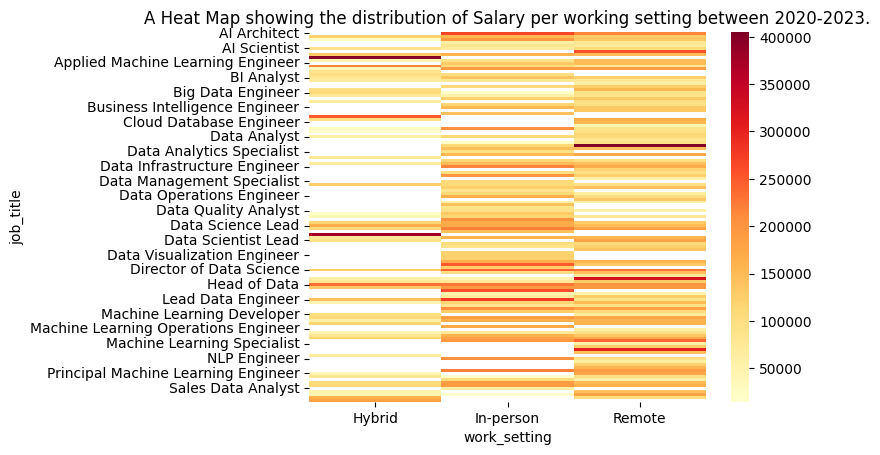

In [22]:
# Using .pivot_table to create a pivot table of magnitude of salary in USD of each job title per work year
working_heat = jobs_df.pivot_table(index='job_title', columns='work_setting', values='salary_in_usd')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(working_heat, cmap='YlOrRd').set(title="A Heat Map showing the distribution of Salary per working setting between 2020-2023.");

The heat map presents the salary distribution for various data-related job titles based on the working environment remote, in-person, or hybrid between 2020 and 2023.

From the heat map, the following key points can be observed:

- Remote positions generally show a higher salary distribution across most job titles compared to in-person and hybrid settings. This could be indicative of the increasing value and demand for remote-capable roles in the data industry.
- The in-person work setting appears to offer a lower salary range than remote positions, as shown by the presence of lighter colors in the heatmap.
- Hybrid working settings also display relatively high salaries, though not as uniformly high as remote roles. The distribution is varied across job titles, with some positions showing competitive salaries close to those of remote roles.
- Executive and high-level job titles like 'Director of Data Science' and 'Head of Data' tend to have higher salaries across all work settings, reflecting the critical importance and compensation of these roles in the industry.

This heat map suggests that the data industry may be adjusting salary structures to accommodate the shift towards remote work, which has become more prevalent in recent years. The data also indicates that despite the work environment, higher-level positions consistently command higher salaries.

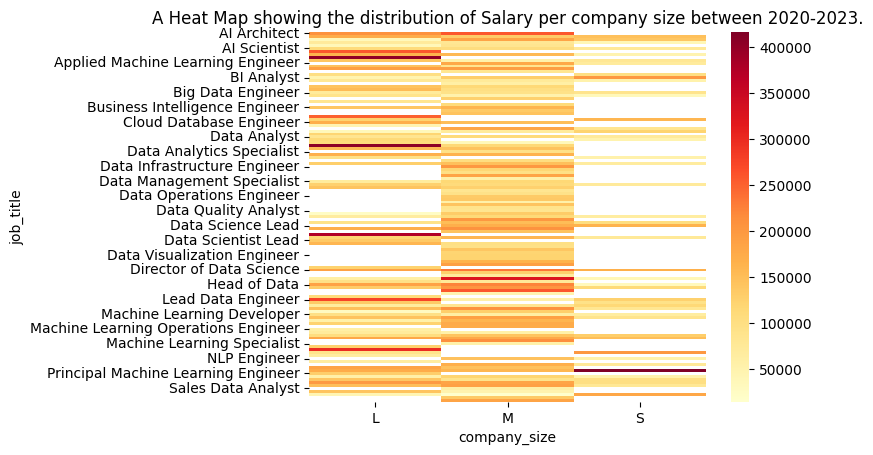

In [23]:
# Using .pivot_table to create a pivot table of magnitude of salary in USD of each job title per work year
company_heat = jobs_df.pivot_table(index='job_title', columns='company_size', values='salary_in_usd')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(company_heat, cmap='YlOrRd').set(title="A Heat Map showing the distribution of Salary per company size between 2020-2023.");

### Geo-distrubution of the data

The heat map depicts the distribution of salaries in USD for various data-related job titles, segmented by company size (small, medium, large) between 2020 and 2023.

Key insights from the heat map:

- Salaries in large (L) companies tend to be higher across various job titles, as indicated by the warmer colors in the 'L' column. This suggests that larger companies have the resources to offer more competitive salaries.
- Medium (M) sized companies also provide competitive salaries, but the intensity of the colors is generally lower compared to large companies, indicating a slightly lower salary distribution.
- Small (S) companies show the lowest salary ranges, with the lightest colors present in the heat map, which is consistent with the expectation that smaller firms might offer lower salaries due to resource constraints.
- Across all company sizes, certain job titles, such as 'Data Scientist', 'Data Engineer', and 'Machine Learning Engineer', appear to command higher salaries, reflective of the demand and value of these roles in the industry.
- The heat map does not display a significant variation in salary distribution from year to year within each company size, suggesting some stability in salary ranges for these job titles over the observed period.

The heat map highlights the impact of company size on salary distribution within the data field, with larger companies generally offering higher salaries, and it underscores the importance of job title as a determinant of salary regardless of company size.

In [24]:
# Count the occurrences of each country
country_company_counts = jobs_df['company_location'].value_counts().reset_index()
country_company_counts.columns = ['country', 'count']

# Plot a world map with the counts
fig_company_count = px.choropleth(country_company_counts,
                    locations="country",
                    locationmode='country names',
                    color="count",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig_company_count.update_layout(
    title={
        'text': "Global Distribution by Company Location 2020-2023",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig_company_count.show();

The choropleth map portrays the global distribution of companies by location from 2020 to 2023, based on the count of entries from a dataset.

Key observations from the map:

- The United States is highlighted in yellow, indicating it has the highest count of companies in the dataset, which significantly exceeds those of other regions.
- Countries in Europe, Asia, and South America are various shades of blue, suggesting a moderate to low count of companies compared to the US.
- This visual distribution suggests a concentration of the data industry or reporting in the United States, with a significant presence in other parts of the world as well. It highlights the geographical disparities in the business locations of companies within the data field.

In [25]:
# Aggregate the salary data by country
company_salary_by_country = jobs_df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Plot the world map
fig_company_salaries = px.choropleth(company_salary_by_country,
                    locations="company_location",
                    locationmode='country names',
                    color="salary_in_usd",
                    hover_name="company_location",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig_company_salaries.update_layout(
    title={
        'text': "Global Map Showing Average Salaries according Company Location 2020-2023",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Show the map
fig_company_salaries.show()

The choropleth map illustrates the average salaries of companies located in various countries from 2020 to 2023, with colors indicating the level of average salary in USD.

Key points from the map:

- The United States and Canada show very high average salaries, indicated by the pink and red colors.
- Countries in Europe, such as the UK and Germany, along with Australia and parts of Asia, are colored in darker blue, signifying high average salaries but not as high as North America.
- Most of Africa, South America, and parts of Asia are colored in lighter blue, suggesting lower average salaries compared to North America and Europe.
- The map highlights the disparity in average salary levels across the world, with developed countries tending to offer higher average salaries. It serves as an analytical tool to understand how geographic location correlates with salary structures globally, indicating potential economic and market influences on compensation.

In [26]:
# Count the occurrences of each country
country_employee_counts = jobs_df['employee_residence'].value_counts().reset_index()
country_employee_counts.columns = ['country', 'count']

# Plot a world map with the counts
fig_employee_count = px.choropleth(country_employee_counts,
                    locations="country",
                    locationmode='country names',
                    color="count",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig_employee_count.update_layout(
    title={
        'text': "Global Distribution of Employees According Residence 2020-2023",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig_employee_count.show();

The choropleth map illustrates the global distribution of employees by their country of residence from 2020 to 2023.

Key insights include:

- The United States stands out with the brightest coloring, indicating it has the highest number of employees within the data set, suggesting a significant concentration of the workforce or reporting in the data industry.
- Countries in Europe and Asia exhibit varying shades of blue, with some countries having a moderate count of employees, while others have fewer.
- Africa, South America, and many parts of Asia appear to have a lower count of employees, as indicated by their darker shading.
- The map provides a visualization of where employees in the data set are predominantly located, potentially reflecting the regions' tech industry presence, labor market size, and the data industry's global footprint.

In [27]:
# Aggregate the salary data by country
employee_salary_by_country = jobs_df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

# Plot the world map
fig_employee_salaries = px.choropleth(employee_salary_by_country,
                    locations="employee_residence",
                    locationmode='country names',
                    color="salary_in_usd",
                    hover_name="employee_residence",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig_employee_salaries.update_layout(
    title={
        'text': "Global Map Showing Average Salaries according Employee Residence 2020-2023",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Show the map
fig_employee_salaries.show()

The choropleth map provides a visual representation of average salaries in USD based on employee residence across different countries from 2020 to 2023.

Key insights from the map:

- North America, particularly the United States, is shaded in a deep pink, indicating the highest average salaries, which suggests that employees residing in the US may enjoy higher compensation levels in the data field.
- Western European countries, as well as Australia, also show high average salaries, depicted in shades of purple, though not as high as in the US.
- In contrast, South America, Africa, and many parts of Asia and Eastern Europe are colored in darker blue, representing lower average salaries.
- This map illustrates the global variation in salary expectations for data-related professions, reflecting the economic disparities and possibly the cost of living differences between these regions. The data indicates that geographical location is a significant factor in salary determination for employees within the data industry.

<ipython-input-28-9576cfc5b432>:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



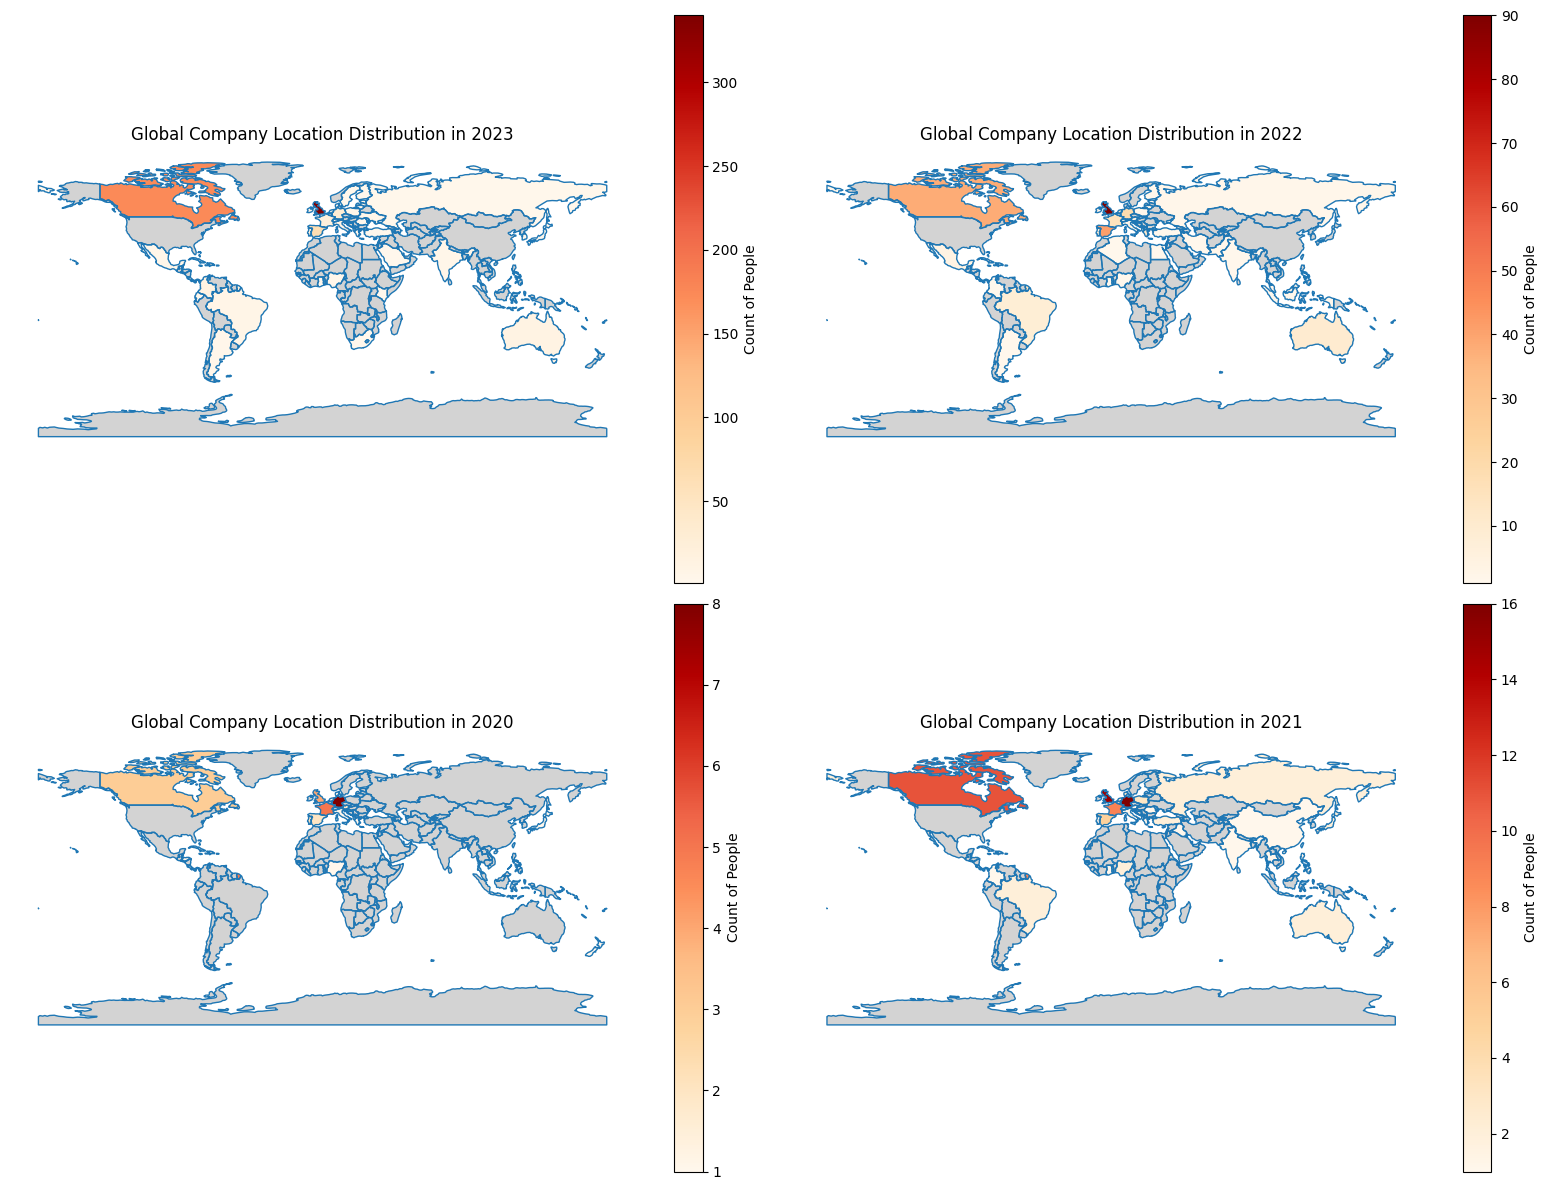

In [28]:
# Load world geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create figure and axes for the 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# List of years to plot
years = jobs_df.work_year.unique().tolist()

for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    df_filtered = jobs_df[jobs_df['work_year'] == year]

    # Aggregate counts by country
    counts = df_filtered['company_location'].value_counts().reset_index()
    counts.columns = ['country', 'count']

    # Merge counts with world geometry
    world_counts = world.merge(counts, how='left', left_on='name', right_on='country')

    # Plot
    ax = axes[i//2, i%2]
    world_counts.boundary.plot(ax=ax, linewidth=1)
    world_counts.plot(column='count', ax=ax, legend=True,
                      legend_kwds={'label': 'Count of People'},
                      cmap='OrRd', missing_kwds={'color': 'lightgrey'})

    ax.set_title(f'Global Company Location Distribution in {year}')
    ax.axis('off')

plt.tight_layout()
plt.show()

The set of maps provides a year-by-year comparison of the global distribution of companies from 2020 to 2023 according to the recorded data. Here are the key comparisons:

- There is a noticeable increase in the count of companies in certain regions over the four years. In particular, the United States shows a significant rise in company counts, intensifying in color each year, which suggests a growing or more frequently reported presence in the data industry.
- The distribution of companies in other regions, such as Europe, Asia, and South America, appears relatively consistent, with some fluctuations in count but without significant changes in the distribution pattern.
- The color intensity, representing the count of companies, is the deepest in the United States, indicating it has the highest concentration of companies across all four maps.
- Regions like Africa, the Middle East, and Central Asia consistently show lighter colors, suggesting a lower presence or reporting of company locations there.

The overall comparison indicates a stable global presence with a notable increase in some areas, particularly the United States, which could be attributed to various factors, including economic growth, industry expansion, or improved data collection methods over these years.

<ipython-input-29-5f2ec32bc1de>:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



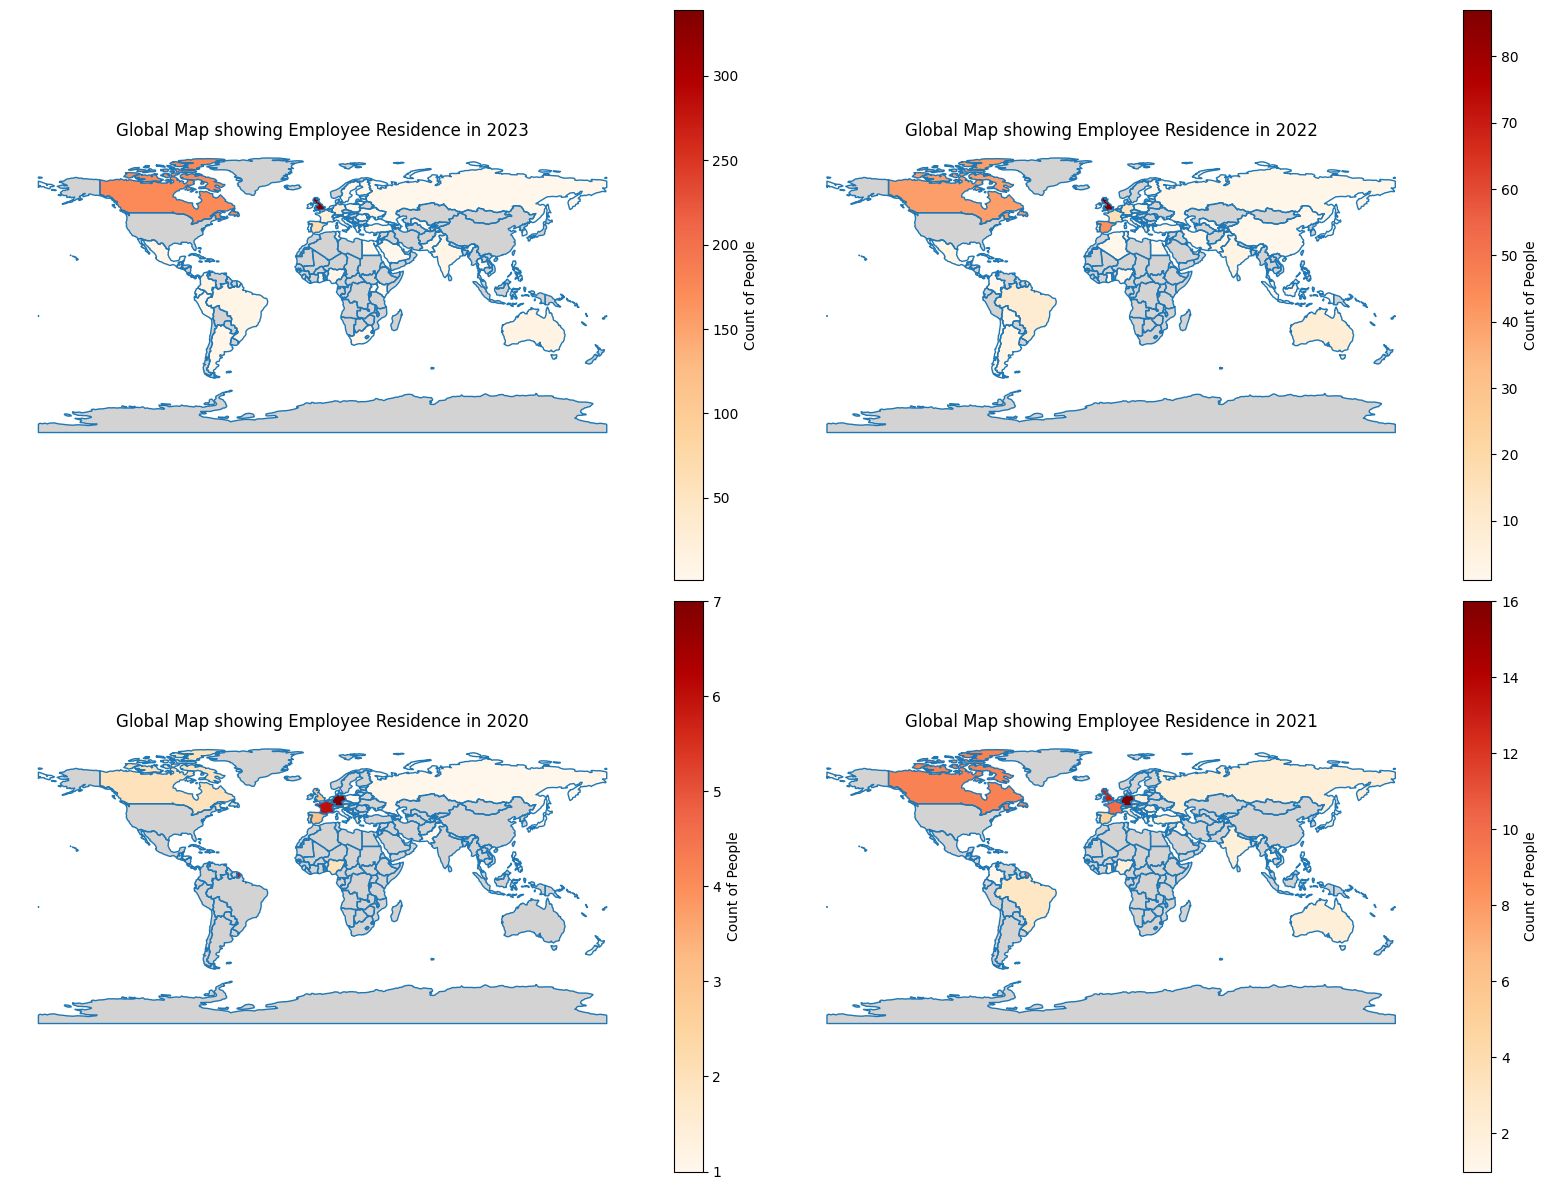

In [29]:
# Load world geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create figure and axes for the 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# List of years to plot
years = jobs_df.work_year.unique().tolist()

for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    df_filtered = jobs_df[jobs_df['work_year'] == year]

    # Aggregate counts by country
    counts = df_filtered['employee_residence'].value_counts().reset_index()
    counts.columns = ['country', 'count']

    # Merge counts with world geometry
    world_counts = world.merge(counts, how='left', left_on='name', right_on='country')

    # Plot
    ax = axes[i//2, i%2]
    world_counts.boundary.plot(ax=ax, linewidth=1)
    world_counts.plot(column='count', ax=ax, legend=True,
                      legend_kwds={'label': 'Count of People'},
                      cmap='OrRd', missing_kwds={'color': 'lightgrey'})

    ax.set_title(f'Global Map showing Employee Residence in {year}')
    ax.axis('off')

plt.tight_layout()
plt.show()

The set of maps shows the global distribution of employees by their residence from 2020 to 2023. Here are the key comparisons:

- The United States consistently appears as the region with the highest count of employees across all four years, highlighted by the most intense coloration, which may indicate a strong or growing presence in the data industry or a larger reporting sample from the US.
- In 2020 and 2021, there's a moderate count of employees in other regions such as Europe and India, evidenced by the lighter shades on the map. This spread seems to grow slightly in 2022 and becomes more pronounced in 2023.
- Over the years, the color intensity in regions outside of the US appears to increase slightly, particularly in Europe and India, suggesting an increase in the number of employees residing in these areas.
- There is a notable consistency in the distribution pattern, with the US, India, and certain European countries remaining the most prominent regions throughout the years.

The overall trend suggests a stable concentration of employees in certain key regions with incremental growth in employee count, especially in India and Europe, which might reflect global industry trends, shifts in the labor market, or improvements in data gathering methods over time.